## 一. 操作题。P119


In [1]:
# 读取数据
import pandas as pd
job = pd.read_csv('hr_job.csv', encoding='gbk')
job

,应聘人员ID,性别,相关经验,教育水平,工作次数
0,11561,NaN,无,大学,5.0
1,33241,NaN,无,大学,0.0
2,21651,NaN,有,大学,11.0
3,28806,男,有,高中,5.0
4,402,男,有,大学,13.0
...,...,...,...,...,...
1287,6593,男,有,硕士,14.0
1288,18572,男,有,大学,14.0
1289,5366,男,有,大学,14.0
1290,11347,男,有,大学,14.0


In [2]:
job.dtypes

应聘人员ID      int64
性别         object
相关经验       object
教育水平       object
工作次数      float64
dtype: object

In [3]:
job.isnull().sum()

应聘人员ID      0
性别        300
相关经验        0
教育水平       34
工作次数        2
dtype: int64

In [4]:
job.loc[job['性别'].isnull()]

,应聘人员ID,性别,相关经验,教育水平,工作次数
0,11561,NaN,无,大学,5.0
1,33241,NaN,无,大学,0.0
2,21651,NaN,有,大学,11.0
6,29452,NaN,无,高中,2.0
9,8722,NaN,无,高中,5.0
...,...,...,...,...,...
1239,889,NaN,有,大学,11.0
1240,6021,NaN,有,硕士,14.0
1266,16437,NaN,有,大学,14.0
1267,14203,NaN,无,高中,9.0


In [5]:
job.loc[job['教育水平'].isnull()]

,应聘人员ID,性别,相关经验,教育水平,工作次数
8,5826,男,无,NaN,2.0
28,24659,男,无,NaN,3.0
50,4830,NaN,无,NaN,2.0
101,3116,男,无,NaN,3.0
114,8241,NaN,有,NaN,11.0
152,5278,男,无,NaN,3.0
217,30472,男,无,NaN,4.0
235,13788,NaN,无,NaN,3.0
260,604,男,无,NaN,3.0
279,23901,男,无,NaN,3.0


In [6]:
job['性别'].fillna('未知',inplace=True)

In [7]:
job['教育水平'].fillna('未知',inplace=True)

In [8]:
job['工作次数'].fillna(job['工作次数'].mean(),inplace=True)

In [9]:
job.isnull().sum()

应聘人员ID    0
性别        0
相关经验      0
教育水平      0
工作次数      0
dtype: int64

In [10]:
import numpy as np
def outRange(Ser1):
    boolInd = (Ser1.mean()-3*Ser1.std()>Ser1) |(Ser1.mean()+3*Ser1.var()< Ser1)
    outrange = Ser1.loc[boolInd]
    return outrange
outlier = outRange(job['工作次数'])
print('使用拉依达准则判定异常值个数为:',outlier.shape[0])
print('异常值的最大值为：',outlier.max())
print('异常值的最小值为：',outlier.min())

使用拉依达准则判定异常值个数为: 1
异常值的最大值为： -10.0
异常值的最小值为： -10.0


In [11]:
outlier

798   -10.0
Name: 工作次数, dtype: float64

In [12]:
job.loc[outlier.index,'工作次数']=job['工作次数'].mean()

In [13]:
outRange(job['工作次数'])

Series([], Name: 工作次数, dtype: float64)

In [14]:
job['教育水平'].value_counts()


大学    795
硕士    271
高中    136
未知     34
博士     33
初中     23
Name: 教育水平, dtype: int64

In [15]:
job['相关经验'].value_counts()

有    919
无    373
Name: 相关经验, dtype: int64

In [16]:
job['性别'].value_counts()


男        891
未知       300
女         87
Other     14
Name: 性别, dtype: int64

In [17]:
job.loc[job['性别']=='Other','性别']='未知'

In [18]:
job

,应聘人员ID,性别,相关经验,教育水平,工作次数
0,11561,未知,无,大学,5.0
1,33241,未知,无,大学,0.0
2,21651,未知,有,大学,11.0
3,28806,男,有,高中,5.0
4,402,男,有,大学,13.0
...,...,...,...,...,...
1287,6593,男,有,硕士,14.0
1288,18572,男,有,大学,14.0
1289,5366,男,有,大学,14.0
1290,11347,男,有,大学,14.0


In [19]:
pd.get_dummies(job)# pd.get_dummies(job,columns=['性别','相关经验','教育水平'])

,应聘人员ID,工作次数,性别_女,性别_未知,性别_男,相关经验_无,相关经验_有,教育水平_初中,教育水平_博士,教育水平_大学,教育水平_未知,教育水平_硕士,教育水平_高中
0,11561,5.0,0,1,0,1,0,0,0,1,0,0,0
1,33241,0.0,0,1,0,1,0,0,0,1,0,0,0
2,21651,11.0,0,1,0,0,1,0,0,1,0,0,0
3,28806,5.0,0,0,1,0,1,0,0,0,0,0,1
4,402,13.0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,6593,14.0,0,0,1,0,1,0,0,0,0,1,0
1288,18572,14.0,0,0,1,0,1,0,0,1,0,0,0
1289,5366,14.0,0,0,1,0,1,0,0,1,0,0,0
1290,11347,14.0,0,0,1,0,1,0,0,1,0,0,0


## 二. 泰坦尼克数据清洗和转换

### 1.对泰坦尼克数据进行清洗

In [20]:
import numpy as np
import pandas as pd
data=pd.read_csv('titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
# 重复数据会导致模型对重复样本过度拟合，提前检测可避免后续偏差。
# 行去重
data.duplicated().sum()

0

In [22]:
# 列去重
def FeatureEquals(df):
    dfEquals=pd.DataFrame([],columns=df.columns,index=df.columns)
    for i in df.columns:
        for j in df.columns:
            dfEquals.loc[i,j]=df.loc[:,i].equals(df.loc[:,j])
    return dfEquals
## 应用上述函数
detEquals=FeatureEquals(data)
print('detail的特征相等矩阵的前5行5列为：\n',detEquals.iloc[:5,:5])
lenDet = detEquals.shape[0]
dupCol = []
for k in range(lenDet):
    for l in range(k+1,lenDet):
        if detEquals.iloc[k,l] & (detEquals.columns[l] not in dupCol):
            dupCol.append(detEquals.columns[l])
##进行去重操作
print('需要删除的列为：',dupCol)
data.drop(dupCol,axis=1,inplace=True)
print('删除多余列后detail的特征数目为：',data.shape[1])


detail的特征相等矩阵的前5行5列为：
             PassengerId Survived Pclass   Name    Sex
PassengerId        True    False  False  False  False
Survived          False     True  False  False  False
Pclass            False    False   True  False  False
Name              False    False  False   True  False
Sex               False    False  False  False   True
需要删除的列为： []
删除多余列后detail的特征数目为： 12


In [23]:
# 空缺值处理
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
naRate = (data.isnull().sum()/ data.shape[0]*100).astype('str')+'%'
print('每个特征缺失的率为：\n',naRate)



每个特征缺失的率为：
 PassengerId                    0.0%
Survived                       0.0%
Pclass                         0.0%
Name                           0.0%
Sex                            0.0%
Age             19.865319865319865%
SibSp                          0.0%
Parch                          0.0%
Ticket                         0.0%
Fare                           0.0%
Cabin            77.10437710437711%
Embarked       0.22446689113355783%
dtype: object


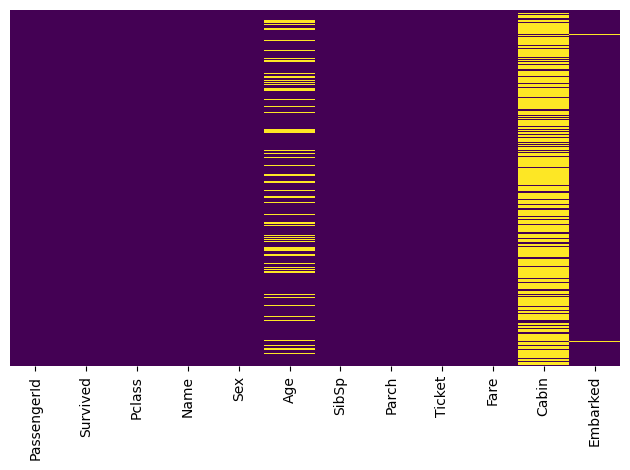

In [25]:
import numpy as np
import seaborn
import matplotlib
seaborn.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# 热力图，当data中有空值时标为黄色
matplotlib.pyplot.tight_layout() 
matplotlib.pyplot.show()

In [26]:
##删除缺失率高的列Cabin Cabin:缺失率达 77.1%，远高于常规保留阈值（通常缺失率＞50% 建议删除），直接删除可避免因填充大量无效值引入噪声。           
data.drop('Cabin',axis = 1,inplace = True)
print('经过缺失值处理后各特征缺失值的数目为：\n',
    data.isnull().sum())

经过缺失值处理后各特征缺失值的数目为：
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [27]:
### Age填充中位数：规避了均值受极端值影响的问题（如数据中存在 80 岁高龄乘客），符合数值型字段填充的稳健性原则。
data['Age'].fillna(data['Age'].median(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [28]:
##删除缺失率低的记录

data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [29]:
np.abs(data.corr())

C:\Users\28146\AppData\Local\Temp\ipykernel_22572\2358139182.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.abs(data.corr())


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.005028,0.035330,0.031319,0.057686,0.001657,0.012703
Survived,0.005028,1.000000,0.335549,0.069822,0.034040,0.083151,0.255290
Pclass,0.035330,0.335549,1.000000,0.336512,0.081656,0.016824,0.548193
Age,0.031319,0.069822,0.336512,1.000000,0.232543,0.171485,0.093707
SibSp,0.057686,0.034040,0.081656,0.232543,1.000000,0.414542,0.160887
Parch,0.001657,0.083151,0.016824,0.171485,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,0.548193,0.093707,0.160887,0.217532,1.000000


In [30]:
#删除无用列
data.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [31]:
### 异常值处理
def box_plot_outliers(s):
    q1, q3 = s.quantile(.25), s.quantile(.75)
    iqr = q3 - q1
    low, up = q1 - 1.5*iqr, q3 + 1.5*iqr
    return s.loc[(s<low) | (s>up)]


In [32]:
for column in ['Survived','Pclass','Age','SibSp','Parch','Fare']:
    outlier = box_plot_outliers(data[column])
    print(column+'使用箱线图原理检测异常值个数为:',outlier.sum())
    print('异常值的最大值为：',outlier.max())
    print('异常值的最小值为：',outlier.min())  

Survived使用箱线图原理检测异常值个数为: 0
异常值的最大值为： nan
异常值的最小值为： nan
Pclass使用箱线图原理检测异常值个数为: 0
异常值的最大值为： nan
异常值的最小值为： nan
Age使用箱线图原理检测异常值个数为: 2574.1699999999996
异常值的最大值为： 80.0
异常值的最小值为： 0.42
SibSp使用箱线图原理检测异常值个数为: 201
异常值的最大值为： 8
异常值的最小值为： 3
Parch使用箱线图原理检测异常值个数为: 340
异常值的最大值为： 6
异常值的最小值为： 1
Fare使用箱线图原理检测异常值个数为: 14721.828999999998
异常值的最大值为： 512.3292
异常值的最小值为： 66.6


该数据的异常值，符合我们对于数据的预先认知，遂不进行处理。

In [33]:
# for column in ['Age','SibSp','Parch','Fare']:
# data.loc[box_plot_outliers(data[column]).index,column]=data[column].mean()


In [34]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [35]:
data.to_csv('titanicqingxi.csv')
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


其它方法：

In [36]:
#使用随机森林进行预测
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

data=pd.read_csv('titanic_train.csv')

age_df = data[['Age', 'Pclass','Sex']]


In [37]:
age_df

,Age,Pclass,Sex
0,22.0,3,male
1,38.0,1,female
2,26.0,3,female
3,35.0,1,female
4,35.0,3,male
...,...,...,...
886,27.0,2,male
887,19.0,1,female
888,NaN,3,female
889,26.0,1,male


In [38]:
age_df=pd.get_dummies(age_df)
age_df

,Age,Pclass,Sex_female,Sex_male
0,22.0,3,0,1
1,38.0,1,1,0
2,26.0,3,1,0
3,35.0,1,1,0
4,35.0,3,0,1
...,...,...,...,...
886,27.0,2,0,1
887,19.0,1,1,0
888,NaN,3,1,0
889,26.0,1,0,1


In [39]:
known_age = age_df[age_df.Age.notnull()].iloc[:,:].values
known_age

array([[22.,  3.,  0.,  1.],
       [38.,  1.,  1.,  0.],
       [26.,  3.,  1.,  0.],
       ...,
       [19.,  1.,  1.,  0.],
       [26.,  1.,  0.,  1.],
       [32.,  3.,  0.,  1.]])

In [40]:
unknown_age = age_df[age_df.Age.isnull()].iloc[:,:].values
unknown_age

array([[nan,  3.,  0.,  1.],
       [nan,  2.,  0.,  1.],
       [nan,  3.,  1.,  0.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  1.,  0.],
       [nan,  3.,  0.,  1.],
       [nan,  1.,  1.,  0.],
       [nan,  3.,  1.,  0.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  1.,  0.],
       [nan,  3.,  0.,  1.],
       [nan,  1.,  0.,  1.],
       [nan,  1.,  0.,  1.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  1.,  0.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  1.,  0.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  1.,  0.],
       [nan,  3.,  1.,  0.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  0.,  1.],
       [nan,  3.,  0.,  1.],
       [nan,  1.,  1.,  0.],
       [nan,  1.,  0.,  1.],
       [nan,  

In [41]:
y = known_age[:, 0]
X = known_age[:, 1:]
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1:])
data.loc[ (data.Age.isnull()), 'Age' ] = predictedAges 

In [42]:
data['Age'].isnull().sum()

0

### 2.对泰坦尼克数据进行标准化和转换

In [43]:
# 方法一：
titanic=pd.read_csv('titanicqingxi.csv',index_col=0)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [45]:
# 对年龄进行离散化
titanic['Age'] = pd.cut(titanic['Age'],[0,6,12,17,45,69,80],labels=[1,2,3,4,5,6])
# titanic['Age'] = pd.cut(titanic['Age'],5,right=False,labels=[1,2,3,4,5])
titanic['Age']

0      4
1      4
2      4
3      4
4      4
      ..
886    4
887    4
888    4
889    4
890    4
Name: Age, Length: 889, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [46]:
titanic['Parch'].describe()

count    889.000000
mean       0.382452
std        0.806761
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [47]:
# 对Fare进行离散化
titanic['Fare'] = pd.cut(titanic['Fare'],3,labels=[1,2,3])

In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    object  
 3   Age       889 non-null    category
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    category
 7   Embarked  889 non-null    object  
dtypes: category(2), int64(4), object(2)
memory usage: 50.7+ KB


In [49]:
# 对Parch进行离散化
titanic['Parch'] = pd.cut(titanic['Parch'],[-1,3,6],labels=[1,2])
titanic['Parch'].value_counts()

1    879
2     10
Name: Parch, dtype: int64

In [50]:
# 对SibSP进行离散化
titanic['SibSp'] = pd.cut(titanic['SibSp'],[-1,3,8],labels=[1,2])
titanic['SibSp'].value_counts()

1    859
2     30
Name: SibSp, dtype: int64

In [51]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    object  
 3   Age       889 non-null    category
 4   SibSp     889 non-null    category
 5   Parch     889 non-null    category
 6   Fare      889 non-null    category
 7   Embarked  889 non-null    object  
dtypes: category(4), int64(2), object(2)
memory usage: 38.8+ KB


In [52]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,4,1,1,1,S
1,1,1,female,4,1,1,1,C
2,1,3,female,4,1,1,1,S
3,1,1,female,4,1,1,1,S
4,0,3,male,4,1,1,1,S
...,...,...,...,...,...,...,...,...
886,0,2,male,4,1,1,1,S
887,1,1,female,4,1,1,1,S
888,0,3,female,4,1,1,1,S
889,1,1,male,4,1,1,1,C


In [53]:
# 进行哑变量处理
titanic= pd.get_dummies(titanic,columns=['Sex','Embarked'],drop_first=True).astype(int)

In [54]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,4,1,1,1,1,0,1
1,1,1,4,1,1,1,0,0,0
2,1,3,4,1,1,1,0,0,1
3,1,1,4,1,1,1,0,0,1
4,0,3,4,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,4,1,1,1,1,0,1
887,1,1,4,1,1,1,0,0,1
888,0,3,4,1,1,1,0,0,1
889,1,1,4,1,1,1,1,0,0


In [55]:
features = titanic.iloc[:,1:]
label=titanic.iloc[:,0]

In [56]:
features.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [57]:
label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int32

In [58]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd 
import numpy as np 
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#划分数据集
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.33, random_state=2)

clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)  # 设置最大深度为3
clf.fit(x_train, y_train)

# 模型评估
y_pre = clf.predict(x_test)
print("预测结果:", y_pre)

clf.score(x_test, y_test)

预测结果: [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0]


0.8503401360544217

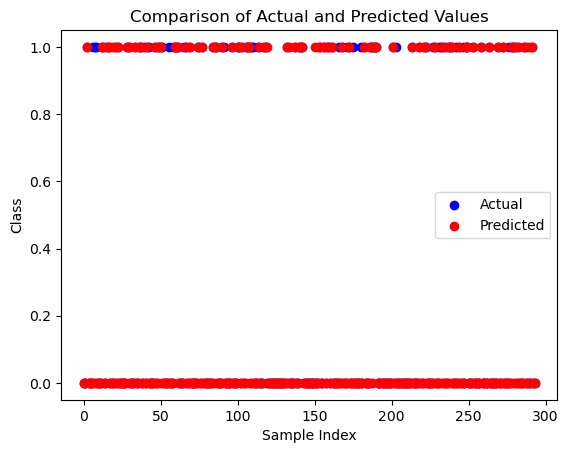

In [59]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pre)), y_pre, color='red', label='Predicted')

plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

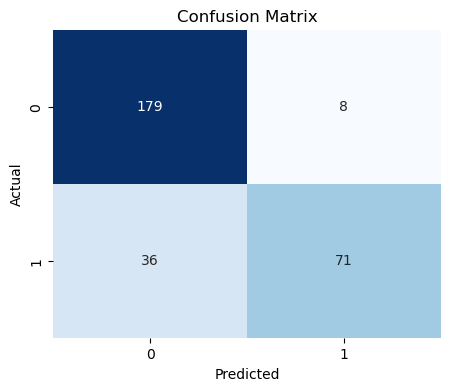

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 y_test 和 y_pred 已经定义
cm = confusion_matrix(y_test, y_pre)

# 可视化混淆矩阵
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pre)

0.8503401360544217

In [62]:
from sklearn.metrics import precision_score

precision_score( y_test, y_pre)# 二分类：binary

0.8987341772151899

In [63]:
from sklearn.metrics import recall_score

recall_score( y_test, y_pre)

0.6635514018691588

In [64]:
from sklearn.metrics import f1_score

f1_score( y_test, y_pre)

0.7634408602150539

In [65]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [66]:
clf.predict(np.array([2,2,0,0,2,1,0,0]).reshape(1,-1))

c:\Users\28146\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [67]:
#决策树绘图，需要sklearn版本>0.21
import sklearn
print(sklearn.__version__)

1.3.0


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文显示
plt.figure(figsize=(15, 9))

# 将 feature_names 转换为列表
plot_tree(clf, 
          filled=True, 
          feature_names=titanic.columns[1:].tolist(),  # 添加 .tolist()
          class_names=['0', '1'])
plt.show()

In [69]:
#网格搜索调参
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(x_train, y_train)

GS.best_params_


{'criterion': 'entropy',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier  # 添加这行导入

# 假设 x_train 和 y_train 已经定义
parameters = {'splitter': ['best', 'random'],
              'criterion': ['gini', 'entropy'],
              'max_depth': list(range(1, 10)),
              'min_samples_leaf': list(range(1, 50, 5)),
              'min_impurity_decrease': np.linspace(0, 0.5, 20)
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(x_train, y_train)

print("Best Parameters:", GS.best_params_)


In [ ]:
GS.best_score_

In [ ]:
#随机森林模型
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(n_estimators=100)

In [ ]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
random_forest.score(x_train,y_train)

0.8521008403361344